In [1]:
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import geopandas as gpd
import networkx as nx
from utils.save_read_graph import read
from section3.scenario1 import scenario_1
from section3.scenario3 import Scenario3

#Station by size, 1: 0, 2: 91, 3: 121
Number of tons covered by our network: 636.1751532075917
Number of tons sold in profit in our network: 200.17515320759188
#Station by size, 1: 30, 2: 53, 3: 238
Number of tons covered by our network: 1064.2644649552294
Number of tons sold in profit in our network: 381.26446495522976
#Station by size, 1: 22, 2: 18, 3: 292
Number of tons covered by our network: 1206.7780191151903
Number of tons sold in profit in our network: 457.3780191151899
#Station by size, 1: 4, 2: 20, 3: 311
Number of tons covered by our network: 1282.4608430052965
Number of tons sold in profit in our network: 500.4608430052967


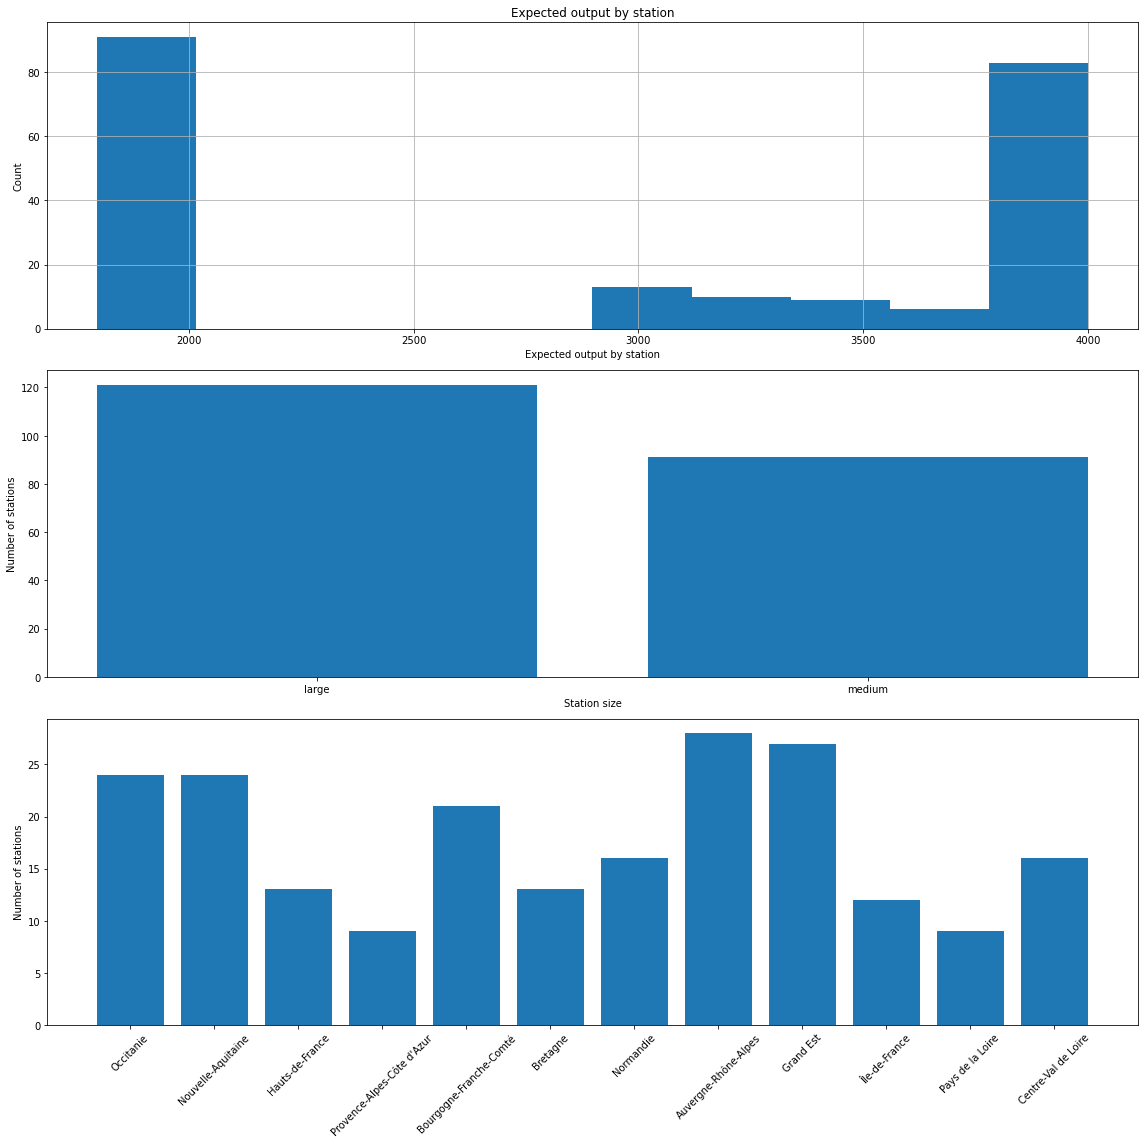

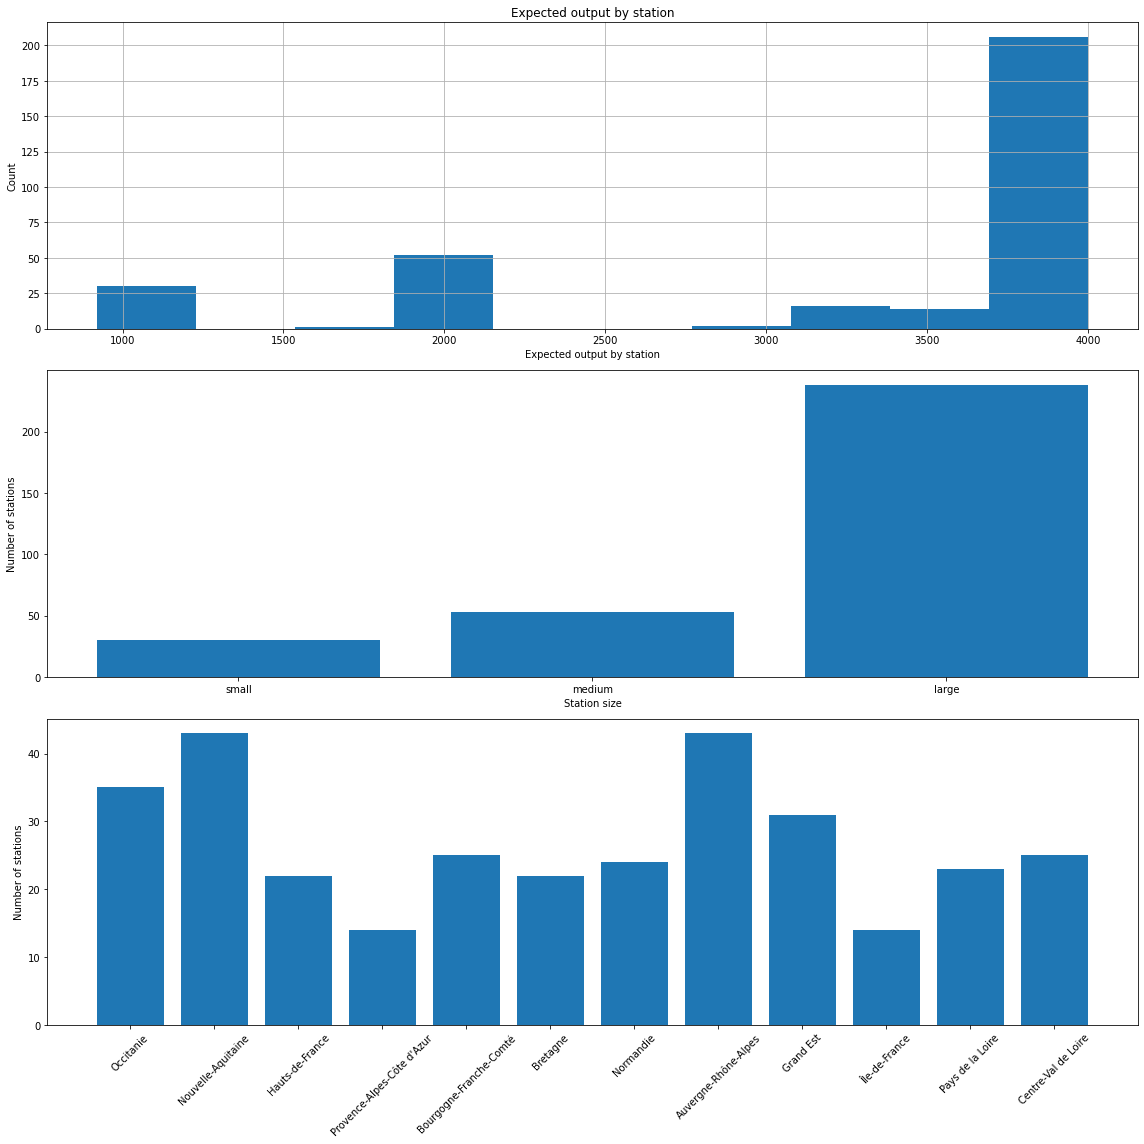

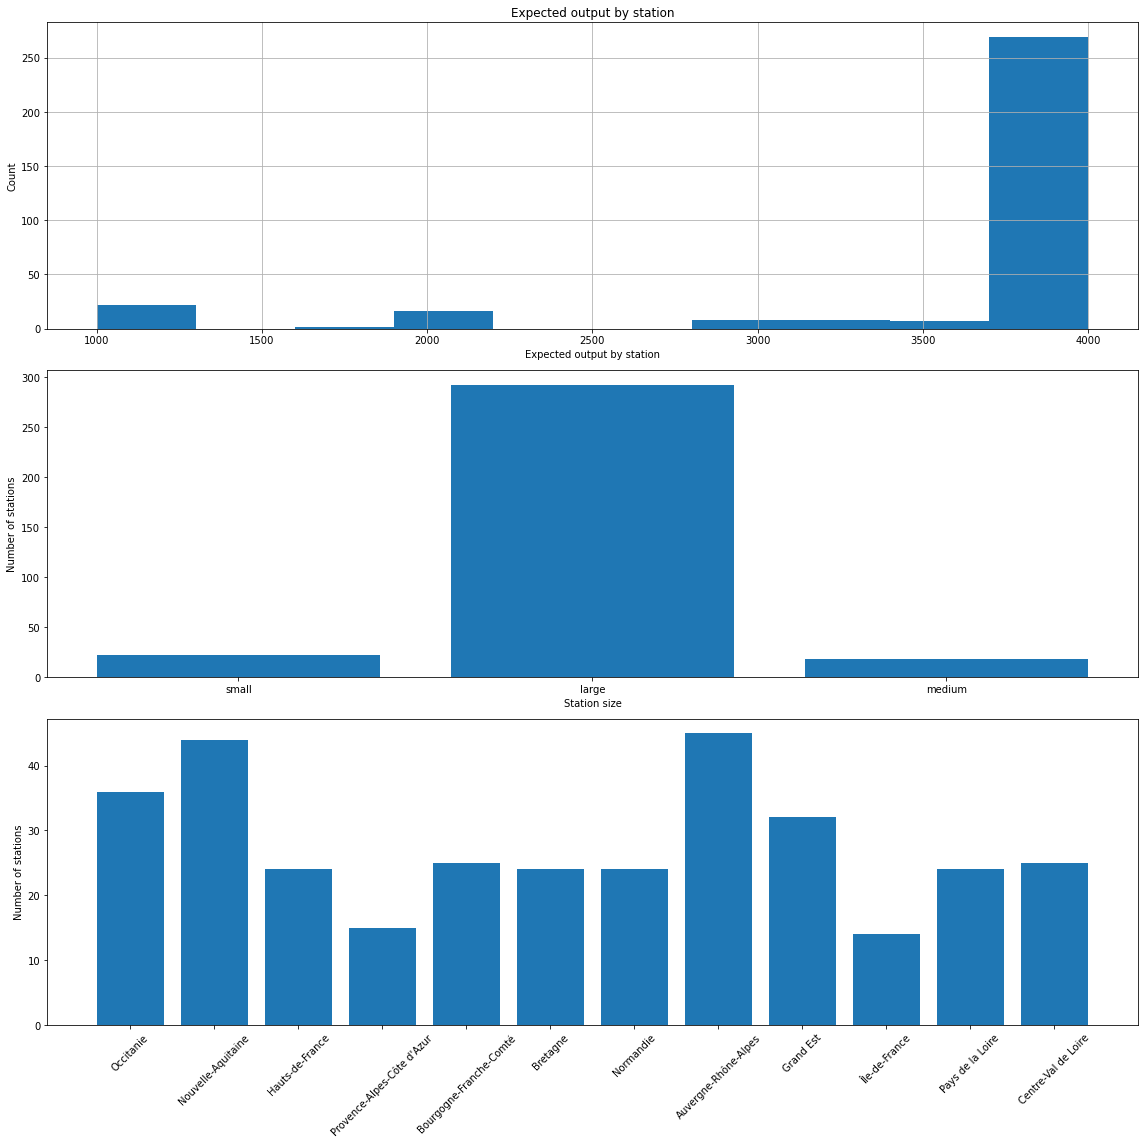

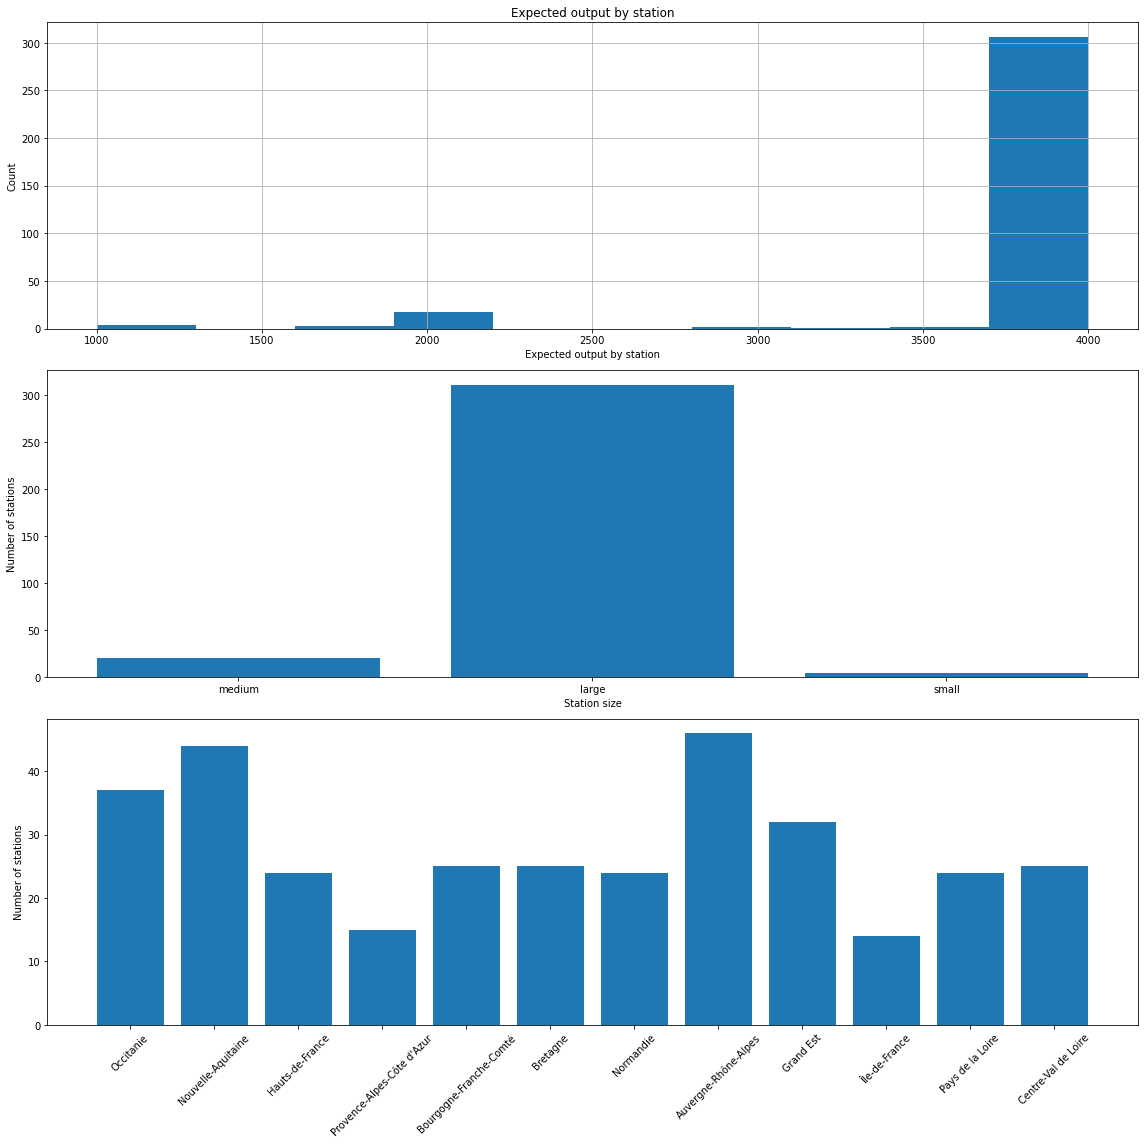

In [2]:
data_path = './data/'
network_path = './networks/p400R400000/'
cn, x, y = read(network_path)
x = {int(k): v for k, v in x.items() }
scenario_1(cn, x,metrics=True)



#Station by size scenario 1, 1: 4, 2: 20, 3: 311
#Station by size scenario 3, 1: 24, 2: 24, 3: 283
Number of tons covered by our network scenario 1: 1282.4608430052965
Number of tons covered by our network scenario 3: 1182.9939895550654
Number of tons sold in profit in our network: 443.7939895550649


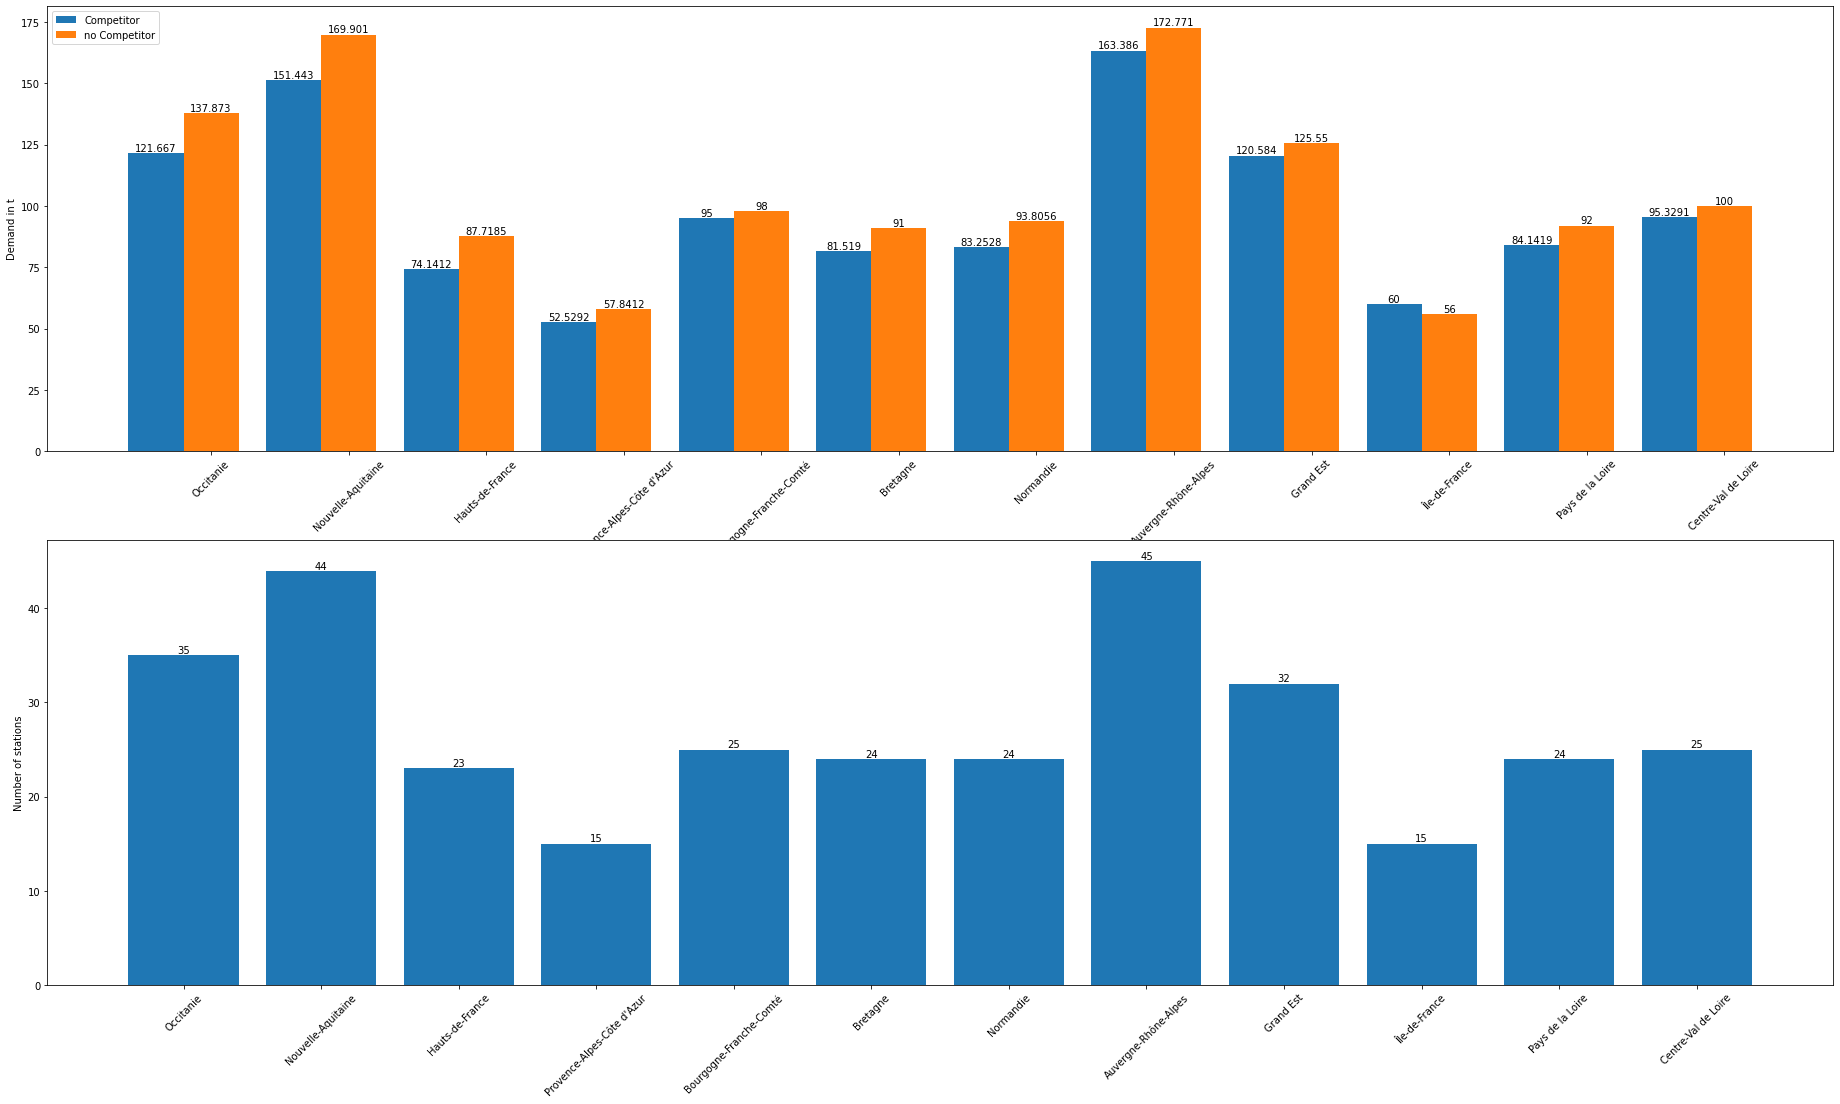

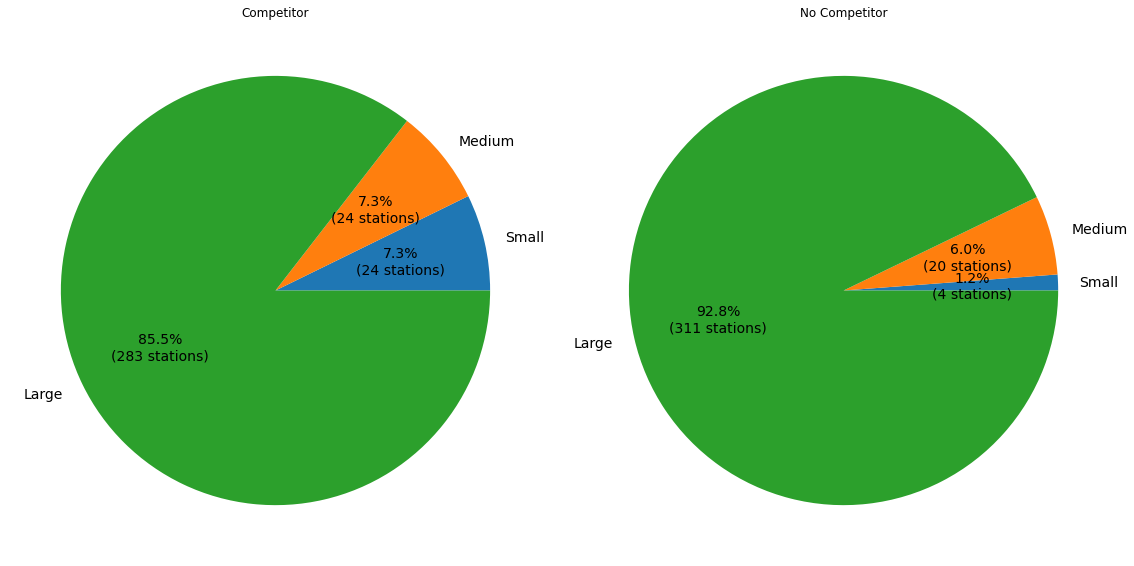

In [3]:
s3 = Scenario3(data_path, cn, x)

s3.summary()


In [98]:
s3.describe()

We plan to deploy 180 H2 stations
The existent player has 327 in France Metropole
113 stations lies within our transportation network
5 stations or  0.028 percent collapse with our deployment plan


#Station by size, 1: 0, 2: 87, 3: 93
Number of tons covered by our network: 393.8995428058016
Number of tons sold in profit in our network: 53.221823987088925
total estimated market demand in our network: 481.7813128272744


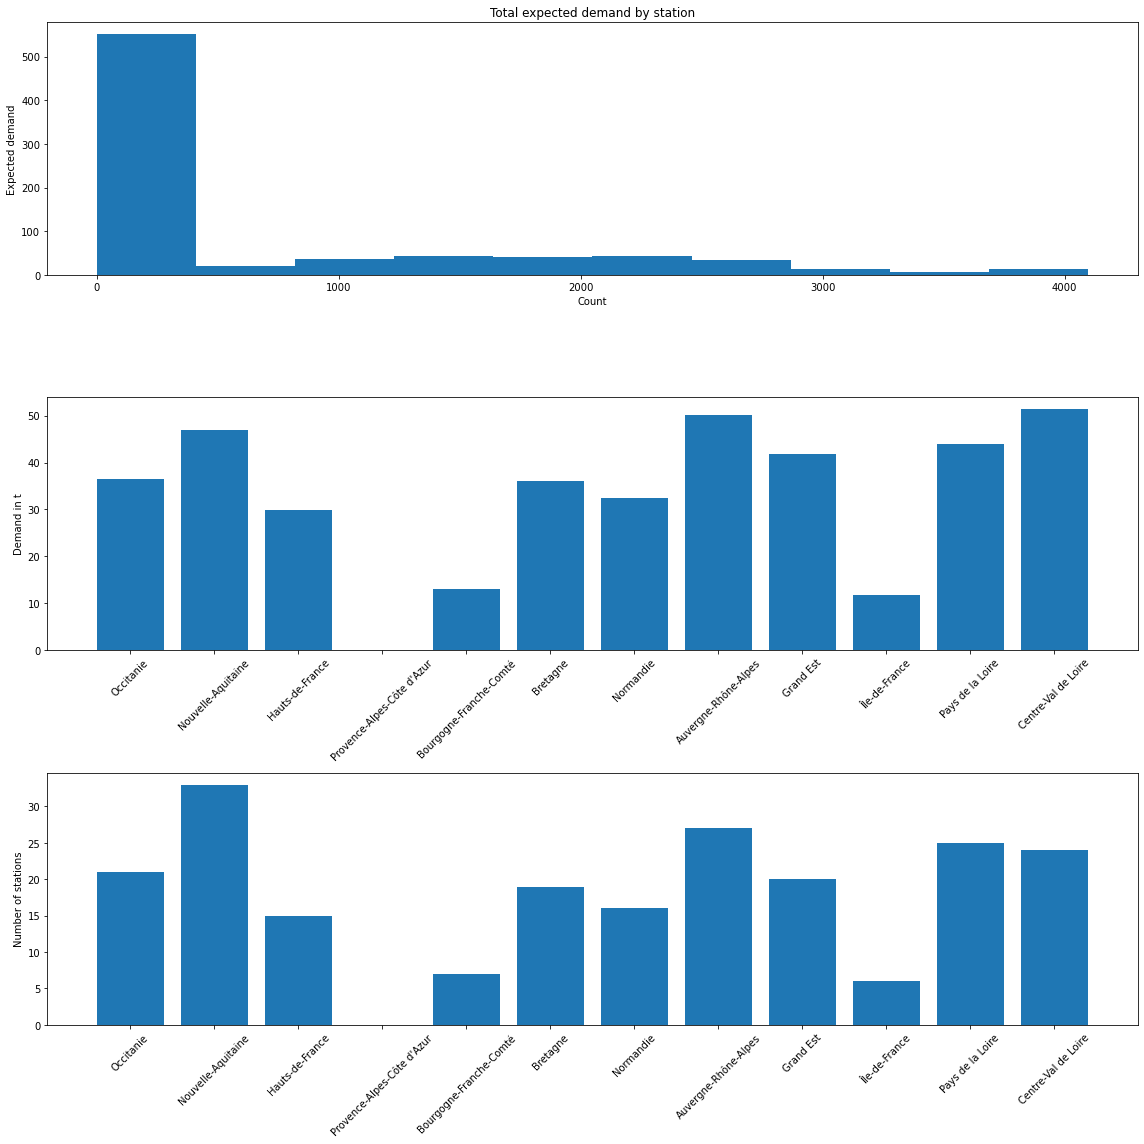

In [79]:
s3.summary()